# 10.3 DBSCAN Method

## Introduction to DBSCAN

DBSCAN is a popular clustering algorithm that is particularly effective for tasks that require the identification of outliers and the discovery of clusters of arbitrary shapes. Unlike other clustering methods such as K-means, DBSCAN does not require the number of clusters to be specified in advance.

### Mechanism and Intuition

DBSCAN works on the principle of identifying 'dense' clusters of points, based on two key parameters: `eps` (epsilon) and `min_samples`:

- **eps (ε):** This parameter defines the radius of the neighborhood around a data point. Points within the ε neighborhood are considered directly reachable.
  
- **min_samples:** This parameter specifies the minimum number of data points that a given point needs to have in its ε neighborhood to qualify as a core point. This includes the point itself.

### Clustering Process

1. **Classification of Points:**
   - **Core Points:** If a point has at least `min_samples` points within its ε neighborhood (including the point itself), it is classified as a core point.
   - **Border Points:** A point that has fewer than `min_samples` points in its neighborhood but lies within the neighborhood of a core point.
   - **Noise Points:** Points that are neither core nor border points.

2. **Building Clusters:**
   - Starting from a core point, DBSCAN forms a cluster by recursively adding all directly reachable points to the cluster. This process also includes points that are reachable from other points in the cluster, thus connecting clusters through core points.
   - This step is repeated for each unvisited core point, leading to the formation of separate clusters.

3. **Handling Noise:**
   - Points that do not belong to any cluster are labeled as noise, which is a significant feature of DBSCAN as it does not force points into clusters, allowing for noise identification within data.

### Advantages of DBSCAN

- **No Need to Specify the Number of Clusters:** Unlike K-means, DBSCAN automatically determines the number of clusters based on the data provided.
- **Capable of Finding Non-linearly Separable Structures:** DBSCAN can effectively find clusters of arbitrary shapes, whereas K-means typically finds spherical clusters.
- **Robust to Outliers:** Since it classifies low-density areas as noise, DBSCAN is quite robust to outliers.

### Considerations

- The quality of the clustering greatly depends on the setting of `eps` and `min_samples`. Improper settings can either merge distinct clusters or split a single cluster into multiple parts.
- DBSCAN is not very efficient for high-dimensional data, as high dimensions make it difficult to estimate the distance between points, thereby affecting density estimation.

DBSCAN is a powerful clustering algorithm with broad applications, particularly useful in fields such as anomaly detection, spatial data analysis, and image segmentation, where the identification of outliers and the ability to handle arbitrarily shaped clusters is crucial.

--- 

Again, we use the power consumption dataset we used in K Cluster, and group them using the DBSCAN algorithm. First of all, load and prepare the data.

In [31]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Fetch the dataset from UCI
individual_household_electric_power_consumption = fetch_ucirepo(id=235)


/Users/wenjiezhu/opt/anaconda3/envs/mbapython/lib/python3.9/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [32]:

# Extract the data as a DataFrame, and remove empty rows
X = individual_household_electric_power_consumption.data.features
X =X.dropna()
X =X.drop(columns=['Date', 'Time'])

# Keep a copy of the original feature names
original_feature_names = X.columns.tolist()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=original_feature_names)  # Reassign original column names to the scaled data

# Take a sample if the dataset is large
sample_size = 10_000  # (only need 10,000 total rows)
X_sample_scaled = X_scaled.sample(n=sample_size, random_state=42)  # Adjust the fraction based on your dataset size


Again, because the data have over 2M records, we would only use a subset of it for our project.

In [33]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## The DBSCAN method

In [34]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_sample_scaled)

# Add the cluster labels back to the scaled data
X_sample_scaled['cluster'] = clusters

# Display the first few rows to see the clustering results
print(X_sample_scaled.head())

         Global_active_power  Global_reactive_power   Voltage  \
1026581             0.388147              -0.441036 -0.206747   
1815               -0.678728               1.244527  1.438322   
1291834            -0.446059               1.563897 -0.305513   
202937             -0.767634               0.676758 -1.580210   
1044824             0.265191              -0.618464  0.959925   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
1026581          0.398759       -0.182337       -0.223036        1.367944   
1815            -0.636253       -0.182337        0.120487       -0.765477   
1291834         -0.366250       -0.182337       -0.051274       -0.646954   
202937          -0.726254       -0.182337       -0.223036       -0.765477   
1044824          0.218757       -0.182337       -0.223036        1.367944   

         cluster  
1026581        0  
1815           0  
1291834        0  
202937         0  
1044824        0  


## DBSCAN Clustering Code Explanation

The piece of Python code snippet applies the DBSCAN clustering algorithm to a subset of a larger dataset. The code is intended to identify clusters within the data based on patterns of similarity among the records, without requiring the number of clusters to be predefined.

### Code Breakdown

1. **DBSCAN Initialization**:
   DBSCAN is initialized with `eps=0.5` and `min_samples=5`, parameters crucial for defining the neighborhood size and the minimum number of points required to form a dense region, respectively.

2. **Fitting DBSCAN to the Data**:
   The `fit_predict` method applies DBSCAN to the scaled data and returns an array of cluster labels. Each record in the dataset is assigned a cluster label, where `-1` indicates noise, i.e., points that do not belong to any cluster.

3. **Adding Cluster Labels to Data**:
   A new column named `cluster` is added to the DataFrame, containing the cluster labels assigned to each data point.

4. **Displaying Results**:
   The first few rows of the DataFrame are printed to provide a quick overview of how the data points are grouped into clusters or identified as noise.

### Rationale Behind Parameter Settings

- **`eps=0.5`**: This small radius for neighborhood definition indicates that only very closely packed points are considered neighbors, suitable for datasets with distinct, tight clusters.

- **`min_samples=5`**: This setting ensures that only points with at least four nearby neighbors are considered core points, helping to identify meaningful clusters while ignoring more sparse arrangements as noise.

We would like to see how many groups are there, then take a look at the features of different groups.

In [35]:
import numpy as np

# Unique clusters and noise
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters[unique_clusters != -1])  # Excluding noise if present

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Unique cluster labels (including noise label '-1'): {unique_clusters}")


Number of clusters (excluding noise): 14
Unique cluster labels (including noise label '-1'): [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]


There are too many groups, I increase eps to make the number of groups smaller

In [60]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=6)
clusters = dbscan.fit_predict(X_sample_scaled)

# Add the cluster labels back to the scaled data
X_sample_scaled['cluster'] = clusters


# Unique clusters and noise
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters[unique_clusters != -1])  # Excluding noise if present

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Unique cluster labels (including noise label '-1'): {unique_clusters}")


Number of clusters (excluding noise): 4
Unique cluster labels (including noise label '-1'): [-1  0  1  2  3]


It seems like by increasing the number of minimum samples, it makes the cluster number more stable

In [61]:
# Add the cluster labels to the DataFrame
X_sample_scaled['cluster'] = clusters

# Group data by cluster label
grouped = X_sample_scaled.groupby('cluster')

# Calculate summary statistics for each cluster
cluster_summary = grouped.mean()  # You can use .describe() to get more detailed statistics

print(cluster_summary)


         Global_active_power  Global_reactive_power   Voltage  \
cluster                                                         
-1                  3.448154               1.564058 -1.590395   
 0                 -0.089877              -0.015456  0.049085   
 1                  2.933530               0.533289 -1.161375   
 2                  1.925888               0.657044 -0.659836   
 3                  4.505156               0.400760 -1.785286   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
cluster                                                                    
-1               3.545930        3.013428        3.518243        0.541513  
 0              -0.091037       -0.165798       -0.025759       -0.004739  
 1               2.945310        5.816969       -0.133174        1.347536  
 2               1.929276        5.854437       -0.140972       -0.720702  
 3               4.563805       -0.182337       11.838441        1.288929  


Then we would like to learn about the features of the clusters.

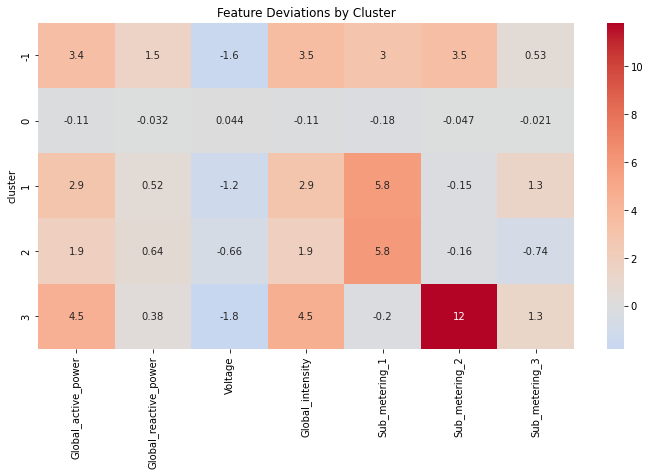

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_sample_scaled' includes your cluster labels and scaled features
# Calculate the overall mean of the features
overall_mean = X_sample_scaled.drop('cluster', axis=1).mean()

# Calculate the mean of each feature for each cluster
cluster_means = X_sample_scaled.groupby('cluster').mean()

# Calculate deviations from the overall mean for each cluster
deviations = cluster_means - overall_mean

# Visualizing deviations to identify significant features
plt.figure(figsize=(12, 6))
sns.heatmap(deviations, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Deviations by Cluster')
plt.show()

In the previous code, we've made a heatmap about the feature deviations. For those confused, here is a discussion about them.

## Understanding Feature Deviation and Heatmap Interpretation

When performing cluster analysis, it's crucial to understand the characteristics that define each cluster. One way to do this is by examining the feature deviations across clusters, typically visualized using a heatmap.

### Feature Deviation

Feature deviation represents the difference between the mean value of a feature in a specific cluster and the overall mean value of that feature across the entire dataset.

- **Positive Deviation**: Indicates that the feature's average value in the cluster is higher than the overall average. This feature may be significant in defining the cluster's characteristics.
- **Negative Deviation**: Shows that the feature's average value in the cluster is lower than the overall average. This feature might be less influential in the cluster's formation.

### Heatmap Visualization

A heatmap is a data visualization tool that uses color-coding to represent the magnitude of values within a matrix.

- **Colors**: In a 'coolwarm' colormap, warm colors (reds) indicate positive deviations, and cool colors (blues) suggest negative deviations.
- **Intensity**: The color's intensity reflects the magnitude of the deviation. The stronger the color, the larger the deviation from the overall mean.
- **Annotations**: Numbers in each cell provide the exact deviation value, adding a quantitative dimension to the visual representation.

### Heatmap in Clustering

In the context of clustering, the heatmap allows us to quickly identify which features significantly distinguish each cluster from the dataset's average. Analyzing these deviations helps us understand the defining characteristics of each cluster.

By interpreting the heatmap, we can discern the most distinctive attributes of the clusters formed by the DBSCAN algorithm, enhancing our understanding of the data's underlying structure.


For each of the feature, we would like to plot the boxplot to learn about the distribution of each feature in each group.

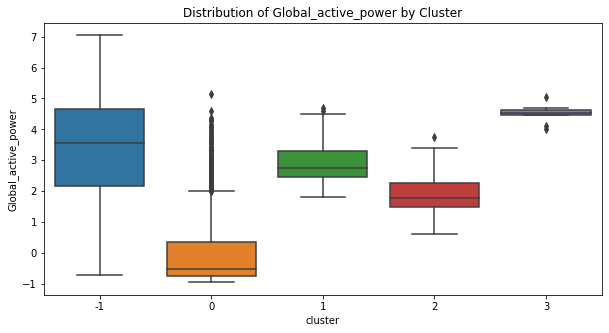

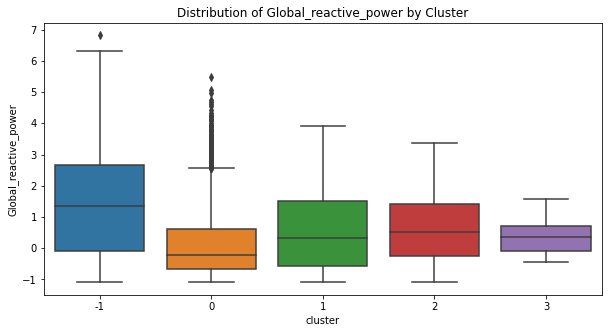

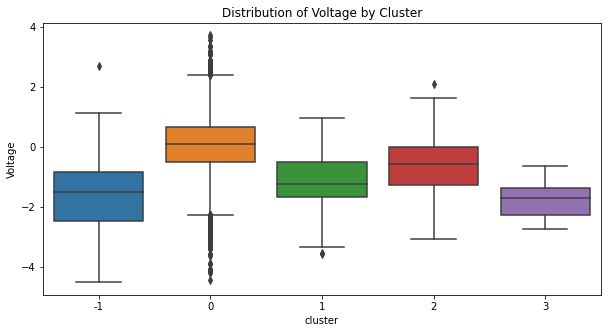

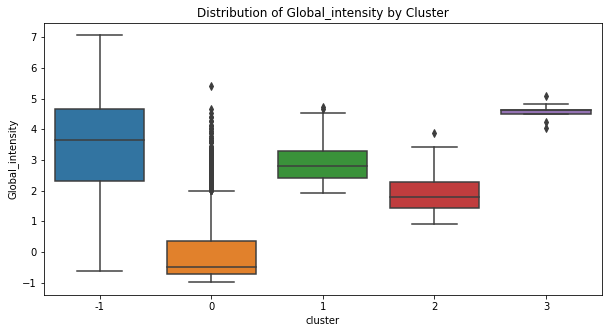

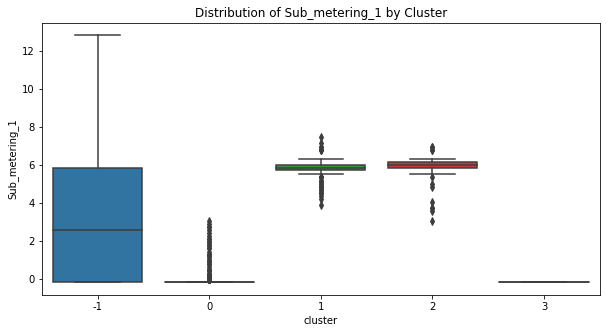

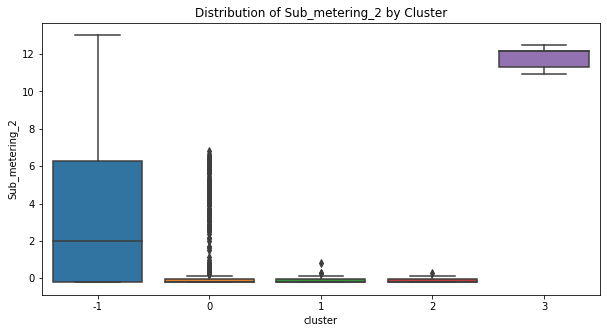

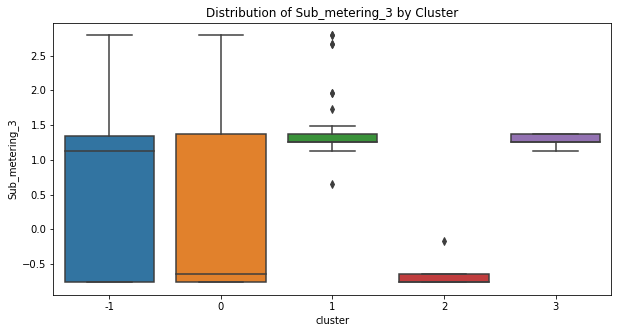

In [64]:

# Optionally, plot distribution of features by cluster
for feature in X_sample_scaled.columns.drop('cluster'):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='cluster', y=feature, data=X_sample_scaled)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


We could observe for some features, some clusters stands out. For example, for sub meter 2 (Laundry room), it could mean that Cluster 3 is when the laundry machine is on.